In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

import csv

import math

In [140]:
background_vagabond_colors = ["#fffdfa", "#fef8f0", "#fbe4cb", "#e8c29d", 
                              "#9a7b56", "#2b322e", "#f0f2f1"]
colors = ["#cec5c1", "#9f8f7f", "#924a42", "#5a2028",
        "#a4b9b1", "#4ea7a6", "#026d73", "#06494f"]
gmk_ursa = ["#A9907E", "#F3DEBA", "#ABC4AA", "#675D50"]

plt.rcParams['savefig.dpi'] = 300;  

rc('font', **{'family':'serif', 'serif':['Computer Modern']})
rc('text', usetex = True)

In [141]:
# path = '/Users/jacksonpowell/Documents/GitHub/learningML/data_files/Gait_cycles_1/test2_SUB01_off_walk_CoM.csv'; 
example_path = '/Users/jacksonpowell/Documents/GitHub/learningML/data_files/PD-gait_2/GaCo09_02.txt';  
demo_path = '/Users/jacksonpowell/Documents/GitHub/learningML/data_files/PD-gait_2/demographics.csv'; 


In [142]:
demo_df = pd.read_csv(demo_path)
demo_df.head()

demo_df.set_index('ID', inplace = True)
weight = demo_df.loc['GaCo01', 'Weight']

In [143]:
headers = ["time", "L_VGRF1", "L_VGRF2", "L_VGRF3", "L_VGRF4",
           "L_VGRF5", "L_VGRF6", "L_VGRF7", "L_VGRF8", 
           "R_VGRF1", "R_VGRF2", "R_VGRF3", "R_VGRF4",
           "R_VGRF5", "R_VGRF6", "R_VGRF7", "R_VGRF8",
           "L_Total", "R_Total"]

example_df = pd.read_csv(example_path, names = headers, sep = '\t')
example_df.head()

,time,L_VGRF1,L_VGRF2,L_VGRF3,L_VGRF4,L_VGRF5,L_VGRF6,L_VGRF7,L_VGRF8,R_VGRF1,R_VGRF2,R_VGRF3,R_VGRF4,R_VGRF5,R_VGRF6,R_VGRF7,R_VGRF8,L_Total,R_Total
0,0.00,0.0,0.0,7.15,3.85,3.08,0.0,0.0,0.0,147.29,141.68,225.39,73.15,68.20,20.57,67.98,9.57,14.08,753.83
1,0.01,0.0,0.0,7.15,3.85,3.08,0.0,0.0,0.0,147.29,141.68,225.39,73.15,68.20,20.57,67.98,9.57,14.08,753.83
2,0.02,0.0,0.0,7.15,3.85,0.00,0.0,0.0,0.0,147.29,141.68,227.48,76.01,70.62,20.57,67.98,9.57,11.00,761.20
3,0.03,0.0,0.0,7.15,3.85,0.00,0.0,0.0,0.0,144.32,141.68,227.48,78.98,75.24,22.88,71.39,9.57,11.00,771.54
4,0.04,0.0,0.0,7.15,3.85,0.00,0.0,0.0,0.0,144.32,141.68,227.48,81.84,77.66,22.88,74.80,11.44,11.00,782.10


Text(0, 0.5, 'Force (N)')

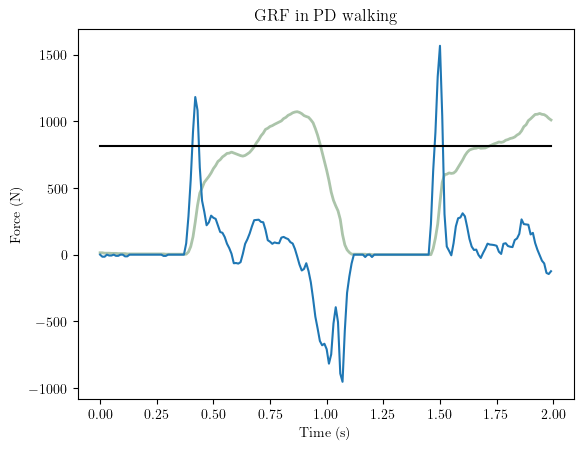

In [144]:
frequency = 100; 
window_duration = 2; 

start_time = 0; 
start_time_index = start_time * frequency; 
window_duration_index = window_duration * frequency; 

x = example_df.loc[:,'time']; 
y1 = example_df.loc[:,'L_Total']; 
y2 = example_df.loc[:,'R_Total']; 

x = x[start_time_index : start_time_index + window_duration_index]; 
y1 = y1[start_time_index : start_time_index + window_duration_index]; 
y2 = y2[start_time_index : start_time_index + window_duration_index]; 

plt.plot(x, y1, color = gmk_ursa[2], linewidth = 2)
# plt.plot(x, y2, color = gmk_ursa[0], linewidth = 2)

dx = 1 / 100 # frequency essentially
dydx = 0.1 * np.gradient(y1, dx)

plt.plot(x, dydx)

plt.plot(x, (x * 0 + weight * 9.8), color = 'black')

plt.title('GRF in PD walking')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')



In [145]:
import glob
import os

(12119, 18)
(1000, 18)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

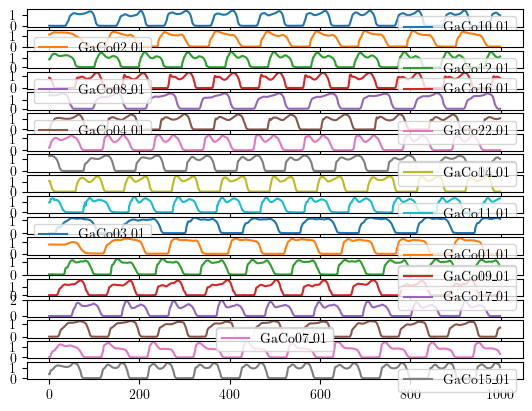

In [146]:
folder_path = '/Users/jacksonpowell/Documents/GitHub/learningML/data_files/PD-gait_2/'; 

all_files = glob.glob(os.path.join(folder_path, "GaCo**_01.txt"))

df = pd.DataFrame({1}); 

for file in all_files:
    patient = (os.path.basename(file))[:6].strip()
    patient_trial = (os.path.basename(file)).replace('.txt', ''); 

    temp_df = pd.read_csv(file, names = headers, sep = '\t'); 

    temp_L_force_df = pd.DataFrame(temp_df.loc[:,'L_Total']); 

    normalized_force = 9.8 * demo_df.loc[patient, 'Weight']; 
    temp_L_force_df = temp_L_force_df / normalized_force; 

    temp_L_force_df.columns = [patient_trial]; 

    df = pd.concat([df, temp_L_force_df], axis = 1); 

df = df.drop(df.columns[0],axis=1)

print(df.shape)

df_short = df.iloc[0:1000]
df_short.columns = df.keys()

print(df_short.shape)

df_short.plot(subplots=True)

[-5.55111512e-17  5.55111512e-17  0.00000000e+00  0.00000000e+00
 -5.55111512e-17]
37 7.546785714285734 114 -5.551115123125783e-17


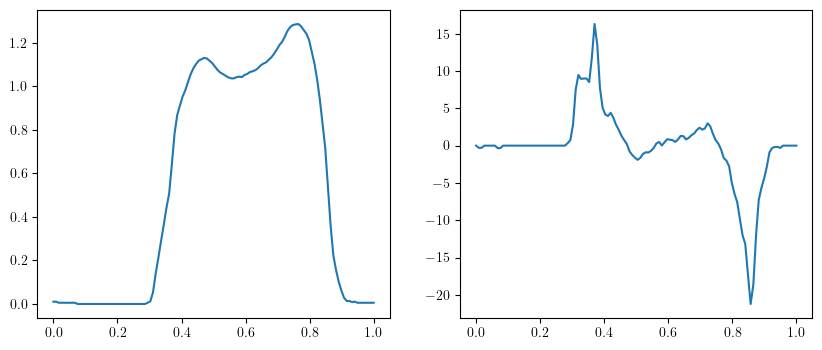

In [147]:
y = df_short["GaCo10_01"]
y = y[0:120]
x = np.linspace(0, 1, len(y))

dx = 1/100

dydx = np.gradient(y, x)

# print(dydx.max(), dydx.min())

cycles = []; 
start_pos = 0; 
end_pos = 0; 
i = 0; 
while i < len(dydx): 
    if dydx[i] > 5: 
        start_pos = i; 
        
        for i in range(start_pos, len(dydx), 1):
            if all(-0.1 < dydx[i:i+5]) and all(dydx[i:i+5] < 0.1): 
                end_pos = i; 
                print(dydx[i:i+5])
                print(start_pos, dydx[start_pos], end_pos, dydx[end_pos])
                break; 
    i += 1; 

start_pos = start_pos - 2; 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4)); 

ax1.plot(x, y); 
ax2.plot(x, dydx); 

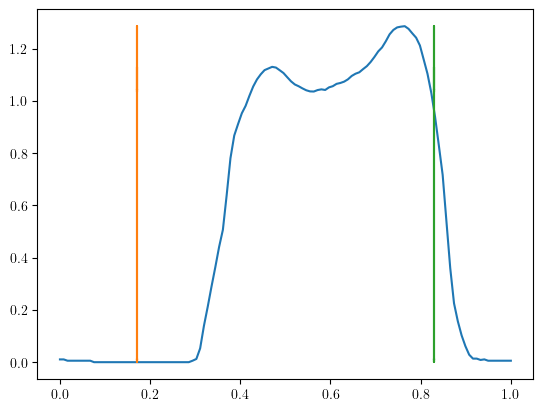

In [148]:
plt.plot(x, y)
plt.plot(x * 0 + 0.17, y)
plt.plot(x * 0 + 0.83, y)

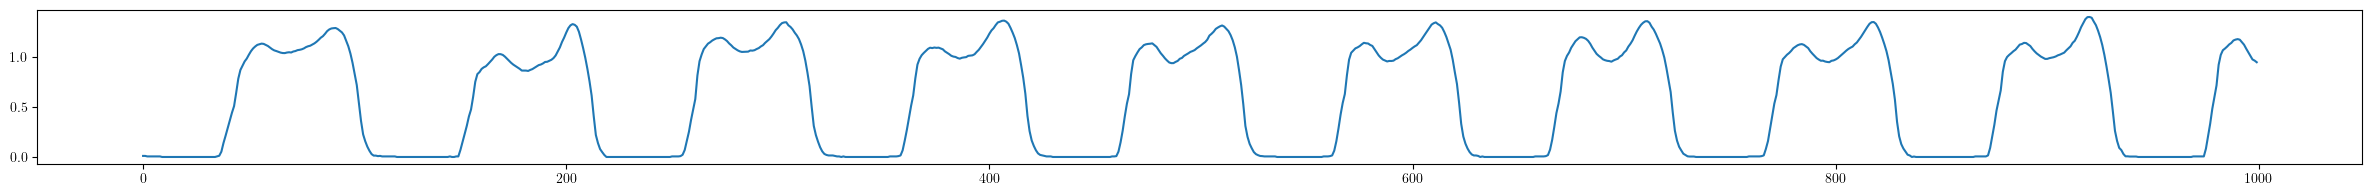

In [149]:

y = df_short['GaCo10_01']; 
plt.figure(figsize=(30, 2))
plt.plot(y)

In [150]:
def get_num_steps(data, sampling_rate):
    
    step_count = 0; 
    i = 0; 
    while i < len(data):
        if data[i] > 0.5:
            step_count += 1; 
            i += 100 * sampling_rate; 
        i += 1; 
    return step_count; 

In [151]:
print(get_num_steps(y, 1))

10


In [152]:
def get_step_indexes(data, sampling_rate):

    num_steps = get_num_steps(data, sampling_rate); 

    step_indexes = np.zeros((num_steps, 2)); 

    step = 0; 
    i = 0; 
    while i < len(data):
        start_pos = 0; 
        end_pos = 0; 
        if data[i] > 0.1: 
            start_pos = i; 
            while data[i] > 0.1: 
                i += 1; 
                if i == len(data):
                    step_indexes = np.delete(step_indexes, -1, 0); 
                    break; 
                elif data[i] < 0.1:
                    end_pos = i; 
                    step_indexes[step, 0] = start_pos - 2; 
                    step_indexes[step, 1] = end_pos + 2; 
                    step += 1; 
        i += 1; 

    return step_indexes; 

In [202]:
def average_step_duration(steps_indexes, sampling_rate):

    num_steps = len(steps_indexes); 

    durations = np.zeros(num_steps); 
    counter = 0; 
    for coords in steps_indexes: 
        durations[counter] = (coords[1] - coords[0]); 
        counter += 1; 

    average_duration = np.mean(durations); 
    std_dev = np.std(durations);  

    return durations, average_duration, std_dev; 

In [229]:
def extract_steps(data, steps_indexes, sampling_rate):

    durations, average_duration, std_dev = average_step_duration(steps_indexes, sampling_rate); 
    print(average_duration)

    mid_points = np.zeros(len(steps_indexes)); 

    faults_list = []; 
    dist = 0; 
    counter = 0; 
    for coords in steps_indexes:
        new_dist = coords[1] - coords[0]; 
        mid_points[counter] = int((coords[1] + coords[0]) / 2); 
        if new_dist > dist and new_dist < 1.5 * average_duration: 
            dist = int(new_dist); 
        elif new_dist > 1.5 * average_duration:
            faults_list.append(counter); 
        counter += 1; 
    
    print(steps_indexes.shape, mid_points.shape)
    steps_indexes = np.delete(steps_indexes, faults_list, 0); 
    mid_points = np.delete(mid_points, faults_list, 0); 
    print(steps_indexes.shape, mid_points.shape)
    
    if 2 % dist == 0: 
        steps = np.zeros((len(steps_indexes), dist)); 
    else: 
        steps = np.zeros((len(steps_indexes), dist)); 
    
    half_dist = int(dist / 2); 

    clipped_counter = 0; 
    counter = int(0); 
    for midpoint in mid_points:
        if midpoint - half_dist > 0 and midpoint + half_dist < len(data):
            steps[counter] = data[int(midpoint - half_dist) : int(midpoint + half_dist)]; 
        else: 
            clipped_counter += 1; 
            print("NOTE: There is some clipping in the data.")
        counter += 1; 

    steps = np.delete(steps, -clipped_counter, 0); 

    average_step = np.zeros(2 * half_dist); 
    for i in range(0, len(average_step), 1):
        average_step[i] = np.mean(steps[:,i]); 

    print(steps)
    return steps, average_step; 

In [217]:
def plot_average_step(data, sampling_rate):
    steps_indexes = get_step_indexes(data, sampling_rate); 
    steps, average_step = extract_steps(data, steps_indexes, sampling_rate); 

    counter = 0; 
    x = np.linspace(0, len(steps[0]), len(steps[0])) * 0.01; 

    for step in steps:
        plt.plot(x, step, linewidth = 0.75, color = colors[counter % len(colors)]); 
        counter += 1; 

    plt.plot(x, average_step, linewidth = 2, color = 'black', label = "Average Step")

    plt.title(f"PD Patient GRF, $N$ = {len(steps)} Steps")
    plt.xlabel("Time (s)")
    plt.ylabel("Force (Body Weights)")
    plt.legend(); 
    plt.show(); 

73.65765765765765
(111, 2) (111,)
(106, 2) (106,)
NOTE: There is some clipping in the data.
NOTE: There is some clipping in the data.
NOTE: There is some clipping in the data.
NOTE: There is some clipping in the data.
NOTE: There is some clipping in the data.
NOTE: There is some clipping in the data.
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01314869 0.01314869 0.00497085]
 [0.         0.         0.         ... 0.00753644 0.00753644 0.00753644]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


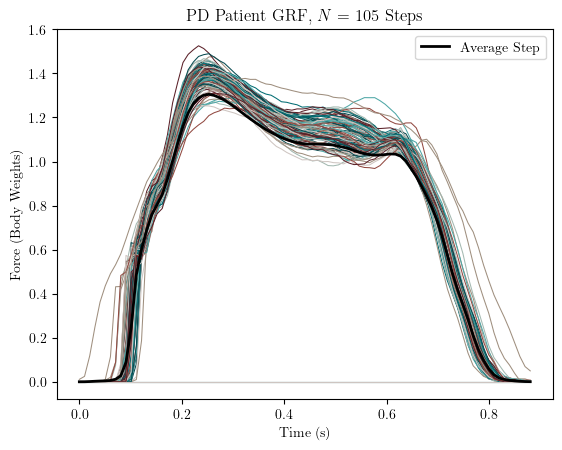

In [230]:
plot_average_step(df['GaCo02_01'], 1); 